In [1]:
import h5py
import lineid_plot
import numpy as np
import matplotlib.pyplot as plt
from ramandecompy import dataprep
from ramandecompy import spectrafit
from ramandecompy import dataplot

In [2]:
def pseudo_voigt(x_data, amplitude, center, sigma, fraction):
    sigma_g = sigma/(np.sqrt(2*np.log(2)))
    gaussian = ((((1-fraction)*(amplitude))/(sigma_g*np.sqrt(2*np.pi)))
                *np.exp((-((x_data-center)**2))/(2*(sigma_g**2))))
    lorentzian = ((fraction*amplitude)/(np.pi))*(sigma/(((x_data-center)**2)+sigma**2))
    pseudo_voigt = gaussian+lorentzian
    return pseudo_voigt

In [14]:
def plot_component(ax, hdf5_file, key, peak_number, color=None):
    """docstring"""
    # open hdf5 file
    hdf5 = h5py.File(hdf5_file, 'r')
    # extract wavenumber data
    x_data = list(hdf5[key+'/wavenumber'])
    # add zero to the beginning of any single digit peak number
    if peak_number < 10:
        peak_number = '0{}'.format(peak_number)
    else:
        peak_number = '{}'.format(peak_number)
    # extract pseudo voigt parameters
    peak_params = hdf5[key+'/Peak_'+peak_number]
    fraction, sigma, center, amplitude = peak_params[0:4]
    # calculate pseudo voigt distribution from peak_params
    y_data = pseudo_voigt(x_data, amplitude, center, sigma, fraction)
    if color = None:
        color = next(ax._get_lines.prop_cycler)['color']
    else:
        color = color
    plt.plot(x_data, y_data, linestyle='--', color=color)
    plt.fill_between(x_data, y_data, alpha=0.3, color=color)

In [4]:
def plot_components(ax, hdf5_file, key, peak_list):
    # will turn int or float into list
    if isinstance(peak_list, (int, float)):
        peak_list = [peak_list]
    else:
        pass
    for _, peak_number in enumerate(peak_list):
        plot_component(hdf5_file, key, peak_number)

In [18]:
hdf5_file = '../ramandecompy/tests/test_files/dataprep_experiment.hdf5'
key = '300C/25s'
hdf5 = h5py.File(hdf5_file)
peak_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

x_data = hdf5['300C/25s/wavenumber']
y_data = hdf5['300C/25s/counts']
dataprep.view_hdf5('../ramandecompy/tests/test_files/dataprep_experiment.hdf5')

**** ../ramandecompy/tests/test_files/dataprep_experiment.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    wavenumber


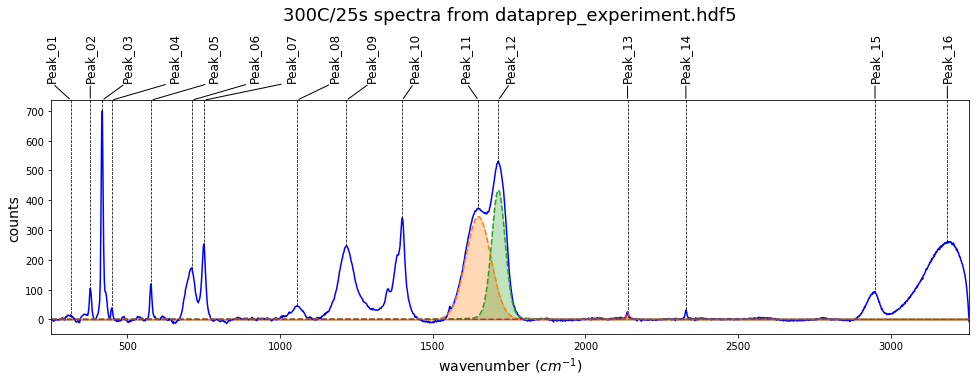

In [21]:
fig, ax = dataprep.plot_fit('../ramandecompy/tests/test_files/dataprep_experiment.hdf5', '300C/25s')
plot_components(hdf5_file, key, [11, 12, 13])